Project 4: Plant leave recognizer

In [ ]:
!pip install -q kaggle

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "angiierobbb"
os.environ['KAGGLE_KEY'] = "6f4f1770f4675f63b4ab350b57a6f49c"

In [ ]:
#import dataset from kaggle 
!kaggle datasets download -d csafrit2/plant-leaves-for-image-classification

100% 6.55G/6.56G [01:29<00:00, 80.7MB/s]
100% 6.56G/6.56G [01:29<00:00, 78.6MB/s]


In [ ]:
#unzip the dataset
!unzip -q /content/plant-leaves-for-image-classification.zip

In [ ]:
import shutil

In [ ]:
# delete diseased folders 
list_diseased = ["/content/Plants_2/test/Alstonia Scholaris diseased (P2a)","/content/Plants_2/test/Arjun diseased (P1a)","/content/Plants_2/test/Bael diseased (P4b)","/content/Plants_2/test/Chinar diseased (P11b)","/content/Plants_2/test/Gauva diseased (P3b)","/content/Plants_2/test/Jamun diseased (P5b)","/content/Plants_2/test/Jatropha diseased (P6b)","/content/Plants_2/test/Lemon diseased (P10b)","/content/Plants_2/test/Mango diseased (P0b)","/content/Plants_2/test/Pomegranate diseased (P9b)","/content/Plants_2/test/Pongamia Pinnata diseased (P7b)","/content/Plants_2/train/Alstonia Scholaris diseased (P2a)","/content/Plants_2/train/Arjun diseased (P1a)","/content/Plants_2/train/Bael diseased (P4b)","/content/Plants_2/train/Chinar diseased (P11b)","/content/Plants_2/train/Gauva diseased (P3b)","/content/Plants_2/train/Jamun diseased (P5b)","/content/Plants_2/train/Jatropha diseased (P6b)","/content/Plants_2/train/Lemon diseased (P10b)","/content/Plants_2/train/Mango diseased (P0b)","/content/Plants_2/train/Pomegranate diseased (P9b)","/content/Plants_2/train/Pongamia Pinnata diseased (P7b)","/content/Plants_2/valid/Alstonia Scholaris diseased (P2a)","/content/Plants_2/valid/Arjun diseased (P1a)","/content/Plants_2/valid/Bael diseased (P4b)","/content/Plants_2/valid/Chinar diseased (P11b)","/content/Plants_2/valid/Gauva diseased (P3b)","/content/Plants_2/valid/Jamun diseased (P5b)","/content/Plants_2/valid/Jatropha diseased (P6b)","/content/Plants_2/valid/Lemon diseased (P10b)","/content/Plants_2/valid/Mango diseased (P0b)","/content/Plants_2/valid/Pomegranate diseased (P9b)","/content/Plants_2/valid/Pongamia Pinnata diseased (P7b)"]

In [ ]:
for directory in list_diseased : 
  shutil.rmtree (directory)

In [ ]:
import tensorflow as tf 
from tensorflow import keras 
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
INPUT_SHAPE = (128,128) 
BATCH_SIZE = 32
SEED = 123
RESCALE  = 1.0/255

In [ ]:
#data generator 
datagenA = ImageDataGenerator(
    rescale=RESCALE, 
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

datagenB = ImageDataGenerator(rescale=RESCALE)

In [ ]:
#flow from directory
train_generator = datagenA.flow_from_directory(
    directory=r"/content/Plants_2/train",
    target_size= INPUT_SHAPE,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    seed=SEED
)

Found 2163 images belonging to 11 classes.


In [ ]:
valid_generator = datagenA.flow_from_directory(
    directory=r"/content/Plants_2/valid",
    target_size=INPUT_SHAPE,
    color_mode="rgb",
    batch_size= BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    seed=SEED
)

Found 55 images belonging to 11 classes.


In [ ]:
test_generator = datagenB.flow_from_directory(
    directory=r"/content/Plants_2/test",
    target_size= INPUT_SHAPE,
    color_mode="rgb",
    batch_size=BATCH_SIZE, 
    class_mode="categorical",
    shuffle=False,
    seed=SEED
)

Found 55 images belonging to 11 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout 

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

filepath = 'weights_epoch_{epoch:02d}.h5'
checkpoint = ModelCheckpoint(filepath, save_weights_only=True, verbose=1)

earlystopping = EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1, 
                              restore_best_weights = False, start_from_epoch=15) 

In [ ]:
#model for classification 
model_leaves=Sequential()

model_leaves.add(Conv2D(filters=32, kernel_size=(3,3),input_shape = (128,128,3)))
model_leaves.add(Activation(activation="relu"))
model_leaves.add(MaxPooling2D(pool_size=(2,2)))
model_leaves.add(Dropout(0.2))

model_leaves.add(Conv2D(filters=64, kernel_size=(3,3)))
model_leaves.add(Activation(activation="relu"))
model_leaves.add(MaxPooling2D(pool_size=(2,2))) 
model_leaves.add(Dropout(0.2))

model_leaves.add(Conv2D(filters=128, kernel_size=(3,3)))
model_leaves.add(Activation(activation="relu"))
model_leaves.add(MaxPooling2D(pool_size=(2,2))) 
model_leaves.add(Dropout(0.2))

model_leaves.add(Conv2D(filters=256, kernel_size=(3,3)))
model_leaves.add(Activation(activation="relu"))
model_leaves.add(MaxPooling2D(pool_size=(2,2))) 
model_leaves.add(Dropout(0.2))

model_leaves.add(Flatten())
model_leaves.add(Dense(64)) 
model_leaves.add(Activation("relu"))
model_leaves.add(Dropout(0.4))

model_leaves.add(Dense(11))
model_leaves.add(Activation("softmax")) 

In [ ]:
model_leaves.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics= ["accuracy"])

model_leaves.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 activation (Activation)     (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 61, 61, 64)        0         
                                                        

In [ ]:
#model.fit
mod_leaves = model_leaves.fit_generator(generator = train_generator,validation_data = valid_generator,epochs=25, callbacks=[checkpoint,earlystopping])

<ipython-input-18-ae740a3c4536>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  mod_leaves = model_leaves.fit_generator(generator = train_generator,validation_data = valid_generator,epochs=25, callbacks=[checkpoint,earlystopping])


Epoch 1/25
68/68 [==============================] - ETA: 0s - loss: 2.2668 - accuracy: 0.1706 
Epoch 1: saving model to weights_epoch_01.h5
68/68 [==============================] - 741s 11s/step - loss: 2.2668 - accuracy: 0.1706 - val_loss: 2.3417 - val_accuracy: 0.1273
Epoch 2/25
68/68 [==============================] - ETA: 0s - loss: 1.9227 - accuracy: 0.3019
Epoch 2: saving model to weights_epoch_02.h5
68/68 [==============================] - 689s 10s/step - loss: 1.9227 - accuracy: 0.3019 - val_loss: 2.0159 - val_accuracy: 0.2000
Epoch 3/25
68/68 [==============================] - ETA: 0s - loss: 1.6781 - accuracy: 0.3944
Epoch 3: saving model to weights_epoch_03.h5
68/68 [==============================] - 680s 10s/step - loss: 1.6781 - accuracy: 0.3944 - val_loss: 1.5772 - val_accuracy: 0.5091
Epoch 4/25
68/68 [==============================] - ETA: 0s - loss: 1.5762 - accuracy: 0.4267
Epoch 4: saving model to weights_epoch_04.h5
68/68 [==============================] - 679s 10s/

In [ ]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'Training and Validation loss')

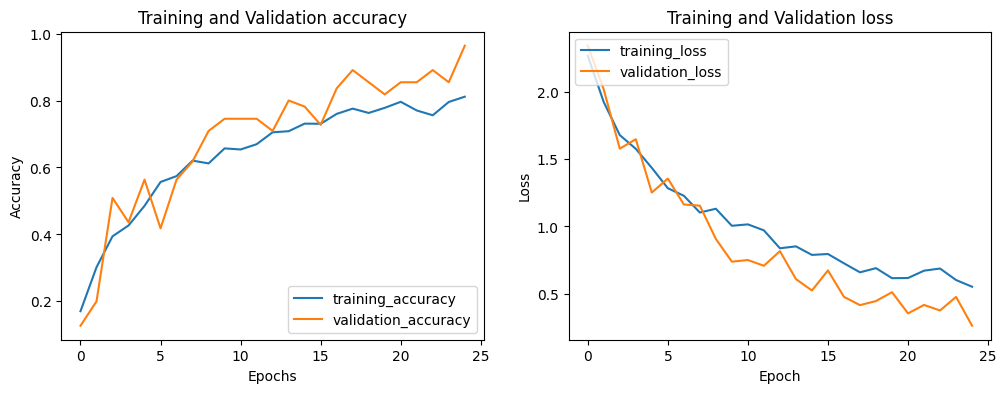

In [ ]:
# plotting accuracy and loss graphs 
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(mod_leaves.history['accuracy'], label= 'training_accuracy')
plt.plot(mod_leaves.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(mod_leaves.history['loss'], label='training_loss')
plt.plot(mod_leaves.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation loss')

In [ ]:
#model.evaluate
model_leaves.evaluate(test_generator) 

2/2 [==============================] - 18s 8s/step - loss: 0.3207 - accuracy: 0.9273


[0.3207297623157501, 0.9272727370262146]

In [ ]:
#model.predict 
predictions = model_leaves.predict_generator(test_generator)

<ipython-input-24-029055db6eb4>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model_leaves.predict_generator(test_generator)


In [ ]:
import numpy as np 

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
predicted_classes

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  5,  5,  6,
        3,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  8, 10,
       10, 10, 10, 10])

In [ ]:
true_classes=test_generator.classes

In [ ]:
true_classes

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10], dtype=int32)

In [ ]:
test_generator.class_indices

{'Alstonia Scholaris healthy (P2b)': 0,
 'Arjun healthy (P1b)': 1,
 'Basil healthy (P8)': 2,
 'Chinar healthy (P11a)': 3,
 'Gauva healthy (P3a)': 4,
 'Jamun healthy (P5a)': 5,
 'Jatropha healthy (P6a)': 6,
 'Lemon healthy (P10a)': 7,
 'Mango healthy (P0a)': 8,
 'Pomegranate healthy (P9a)': 9,
 'Pongamia Pinnata healthy (P7a)': 10}

In [ ]:
class_labels = list(test_generator.class_indices.keys())

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#precision,recall and f1-score metrics
report = classification_report(true_classes, predicted_classes,target_names=class_labels)
print(report)

                                  precision    recall  f1-score   support

Alstonia Scholaris healthy (P2b)       1.00      1.00      1.00         5
             Arjun healthy (P1b)       1.00      1.00      1.00         5
              Basil healthy (P8)       1.00      1.00      1.00         5
           Chinar healthy (P11a)       0.83      1.00      0.91         5
             Gauva healthy (P3a)       1.00      1.00      1.00         5
             Jamun healthy (P5a)       0.71      1.00      0.83         5
          Jatropha healthy (P6a)       1.00      0.40      0.57         5
            Lemon healthy (P10a)       1.00      1.00      1.00         5
             Mango healthy (P0a)       0.83      1.00      0.91         5
       Pomegranate healthy (P9a)       1.00      0.80      0.89         5
  Pongamia Pinnata healthy (P7a)       1.00      1.00      1.00         5

                        accuracy                           0.93        55
                       macro avg    

In [ ]:
true_classes.shape

(55,)

In [ ]:
predicted_classes.shape

(55,)

Text(50.722222222222214, 0.5, 'True Label')

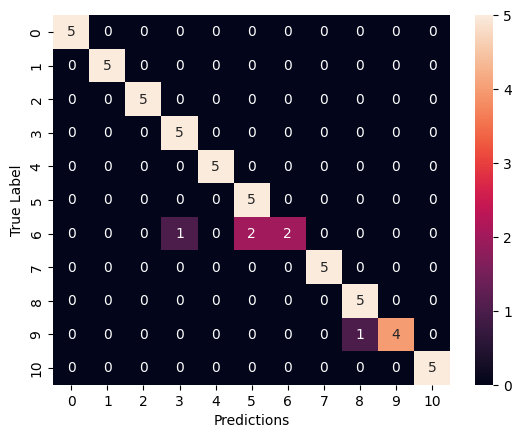

In [ ]:
#confusion matrix 
hm = sns.heatmap(confusion_matrix(true_classes,predicted_classes), annot=True)
hm.set_xlabel('Predictions')
hm.set_ylabel('True Label')